In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))

key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

In [2]:
file=path_results_dots+'mean_across_participants.json'
with open(file) as f:
    as_dots = json.load(f)
file=path_results_dots+'se_across_participants.json'
with open(file) as f:
    se_dots = json.load(f)

In [3]:
file=path_results_gabor+'mean_across_participants.json'
with open(file) as f:
    as_gabor = json.load(f)
file=path_results_gabor+'se_across_participants.json'
with open(file) as f:
    se_gabor = json.load(f)

In [4]:
perf_keys = [elem for elem in key_diff if 'perf' in elem]
oo_keys = [elem for elem in key_diff if 'optout' in elem]
RT_keys = [elem for elem in key_diff if 'RT' in elem]

perf_color = {'perf_no':PV_color['NO'],'Dperf_oo':PV_color['DO'],'Sperf_oo':PV_color['SO']}
perf_ls = {'perf_no':PV_line['NO'],'Dperf_oo':PV_line['DO'],'Sperf_oo':PV_line['SO']}
perf_legend = {'perf_no':'NO','Dperf_oo':'DO','Sperf_oo':'SO'}

oo_color = {'Doptout':PV_color['DO'], 'Soptout':PV_color['SO']}
oo_legend = {'Doptout':'DO', 'Soptout':'SO'}

RT_color = {'DRT_OKoo':PV_color['DO'], 'SRT_OKoo':PV_color['SO'], 'RT_no':PV_color['NO'], 'RT_noNOK':'k'}
RT_ls = {'DRT_OKoo':PV_line['DO'], 'SRT_OKoo':PV_line['SO'], 'RT_no':PV_line['NO'], 'RT_noNOK':'-.'}
RT_legend = {'DRT_OKoo':'DO correct',\
             'SRT_OKoo':'SO correct', 'RT_no':'NO correct', 'RT_noNOK':'NO incorrect'}

In [5]:
file=path_results_gabor+'ap_diff.json'
with open(file) as f:
    ap_diff_gabor = json.load(f)
file=path_results_gabor+'se_diff.json'
with open(file) as f:
    se_diff_gabor = json.load(f)

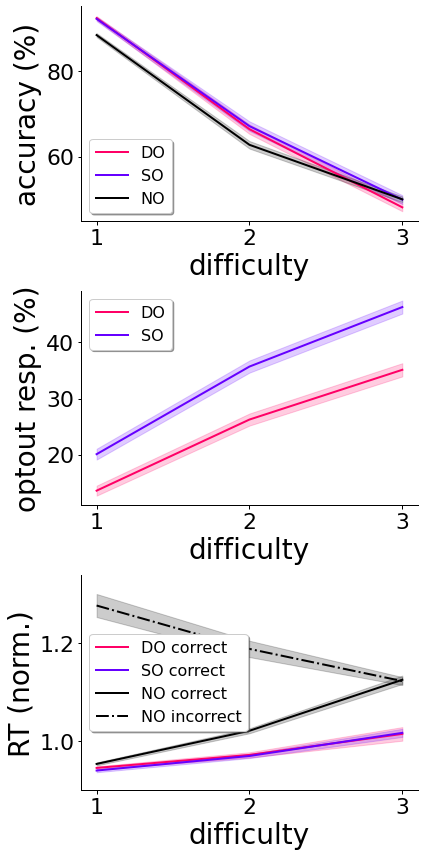

In [9]:
fig,ax = plt.subplots(3,1,figsize=(6,12))
plt.subplots_adjust(wspace = 0.3)  
for k in perf_keys:
    ax[0].plot(unique_signals_gabor,ap_diff_gabor[k],c=perf_color[k],label=perf_legend[k])
    ax[0].fill_between(unique_signals_gabor,np.array(ap_diff_gabor[k])-np.array(se_diff_gabor[k]), \
                   np.array(ap_diff_gabor[k])+np.array(se_diff_gabor[k]), color=perf_color[k], alpha=0.2)
ax[0].set_ylabel('accuracy (%)',fontsize=28)
ax[0].set_xlabel('difficulty',fontsize=28)
ax[0].legend(loc='lower left', shadow=True,fontsize=16)

for k in oo_keys:
    ax[1].plot(unique_signals_gabor,ap_diff_gabor[k],c=oo_color[k],label=oo_legend[k])
    ax[1].fill_between(unique_signals_gabor,np.array(ap_diff_gabor[k])-np.array(se_diff_gabor[k]), \
                       np.array(ap_diff_gabor[k])+np.array(se_diff_gabor[k]), color=oo_color[k], alpha=0.2)

ax[1].legend(loc='upper left', shadow=True,fontsize=16)
ax[1].set_ylabel('optout resp. (%)',fontsize=28)
ax[1].set_xlabel('difficulty',fontsize=28)

for k in RT_keys:
    ax[2].plot(unique_signals_gabor,ap_diff_gabor[k],c=RT_color[k],ls=RT_ls[k],label=RT_legend[k])
    ax[2].fill_between(unique_signals_gabor,np.array(ap_diff_gabor[k])-np.array(se_diff_gabor[k]), \
                       np.array(ap_diff_gabor[k])+np.array(se_diff_gabor[k]), color=RT_color[k], alpha=0.2)
ax[2].set_ylabel('RT (norm.)',fontsize=28)
ax[2].set_xlabel('difficulty',fontsize=28)
ax[2].legend(loc=('center left'), shadow=True,fontsize=16)
#ax[2].set_yticks([1,1.5])
ax[2].set_ylim(0.9,1.34)

for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=22)
    ax[i].set_xticks([1,2,3])

plt.tight_layout()
plt.savefig('figS1_diff_gabor.png')
plt.show()

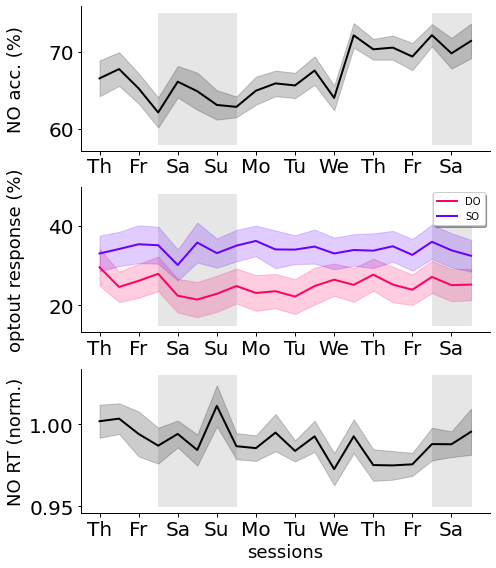

In [13]:
fig, ax = plt.subplots(3,figsize=(7,8))
plt.subplots_adjust(hspace = 0.4)  

ax[0].fill_between([4,8], 58,75,color=[0.9,0.9,0.9])
ax[0].fill_between([18,20], 58,75,color=[0.9,0.9,0.9])
ax[0].plot(np.arange(1,len(as_gabor[key_PV[2]])+1),as_gabor[key_PV[2]],c=PV_color['NO'], zorder=2)
ax[0].fill_between(np.arange(1,len(as_gabor[key_PV[2]])+1),np.array(as_gabor[key_PV[2]])-np.array(se_gabor[key_PV[2]]),\
                   np.array(as_gabor[key_PV[2]])+np.array(se_gabor[key_PV[2]]), color=PV_color['NO'], alpha=0.2)

ax[1].fill_between([4,8], 15, 48,color=[0.9,0.9,0.9])
ax[1].fill_between([18,20], 15, 48,color=[0.9,0.9,0.9])
ax[1].plot(np.arange(1,len(as_gabor[key_PV[0]])+1),as_gabor[key_PV[0]],c=PV_color['DO'], zorder=2)
ax[1].fill_between(np.arange(1,len(as_gabor[key_PV[0]])+1),np.array(as_gabor[key_PV[0]])-np.array(se_gabor[key_PV[0]]),\
                   np.array(as_gabor[key_PV[0]])+np.array(se_gabor[key_PV[0]]), color=PV_color['DO'], alpha=0.2)
ax[1].plot(np.arange(1,len(as_gabor[key_PV[1]])+1),as_gabor[key_PV[1]],c=PV_color['SO'], zorder=2)
ax[1].fill_between(np.arange(1,len(as_gabor[key_PV[1]])+1),np.array(as_gabor[key_PV[1]])-np.array(se_gabor[key_PV[1]]),\
                   np.array(as_gabor[key_PV[1]])+np.array(se_gabor[key_PV[1]]), color=PV_color['SO'], alpha=0.2)

ax[2].fill_between([4,8], 0.95, 1.03,color=[0.9,0.9,0.9])
ax[2].fill_between([18,20], 0.95, 1.03,color=[0.9,0.9,0.9])
ax[2].plot(np.arange(1,len(as_gabor[key_PV[3]])+1),as_gabor[key_PV[3]],c=PV_color['NO'], zorder=2)
ax[2].fill_between(np.arange(1,len(as_gabor[key_PV[3]])+1),np.array(as_gabor[key_PV[3]])-np.array(se_gabor[key_PV[3]]),\
                   np.array(as_gabor[key_PV[3]])+np.array(se_gabor[key_PV[3]]), color=PV_color['NO'], alpha=0.2)

ax[0].set_ylabel('NO acc. (%)')
ax[1].set_ylabel('optout response (%)')
ax[2].set_ylabel('NO RT (norm.)')
ax[2].set_xlabel('sessions')
  
ax[1].legend(("DO","SO"),loc='upper right', shadow=True)

for i in range(3):
    ax[i].set_xticks(np.arange(1,(len(as_gabor[key_PV[0]])+1))[::2])
    ax[i].set_xticklabels(session_labels)

fig.align_ylabels(ax[:])

plt.tight_layout()
plt.savefig('figS1_mean_PV_gabor.png')
plt.show()

In [14]:
file=path_results_gabor+'ACC_PV.json'
with open(file) as f:
    ACC_PV_gabor = json.load(f)

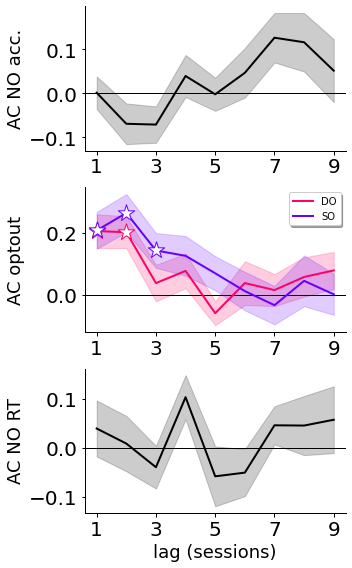

In [16]:
fig, ax = plt.subplots(3,figsize=(5,8))
plt.subplots_adjust(hspace = 0.4)  

for i in range(3):
    ax[i].axhline(0.0,c='k',lw=1)
    ax[i].set_xticks([1,3,5,7,9]) 
    
for j in range(1,len(ACC_PV_gabor[key_PV[0]]['mean'])+1):
    if ACC_PV_gabor[key_PV[0]]['pgranger'][j-1]<0.05:
        ax[1].scatter(j,ACC_PV_gabor[key_PV[0]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['DO'], zorder=3)
ax[1].plot(np.arange(1,len(ACC_PV_gabor[key_PV[0]]['mean'])+1),ACC_PV_gabor[key_PV[0]]['mean'],c=PV_color['DO'],label='DO',zorder=2)
ax[1].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[0]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[0]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[0]]['se']),np.array(ACC_PV_gabor[key_PV[0]]['mean'])
                    +np.array(ACC_PV_gabor[key_PV[0]]['se']), color=PV_color['DO'], alpha=0.2)

for j in range(1,len(ACC_PV_gabor[key_PV[3]]['mean'])+1):
    if ACC_PV_gabor[key_PV[3]]['pgranger'][j-1]<0.05:
        ax[2].scatter(j,ACC_PV_gabor[key_PV[3]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['NO'], zorder=3)
ax[2].plot(np.arange(1,len(ACC_PV_gabor[key_PV[3]]['mean'])+1),ACC_PV_gabor[key_PV[3]]['mean'],c=PV_color['NO'], zorder=2)
ax[2].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[3]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[3]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[3]]['se']),np.array(ACC_PV_gabor[key_PV[3]]['mean'])\
                    +np.array(ACC_PV_gabor[key_PV[3]]['se']), color=PV_color['NO'], alpha=0.2)

for j in range(1,len(ACC_PV_gabor[key_PV[2]]['mean'])+1):
    if ACC_PV_gabor[key_PV[2]]['pgranger'][j-1]<0.05:
        ax[0].scatter(j,ACC_PV_gabor[key_PV[2]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['NO'], zorder=3)
ax[0].plot(np.arange(1,len(ACC_PV_gabor[key_PV[2]]['mean'])+1),ACC_PV_gabor[key_PV[2]]['mean'],c=PV_color['NO'], zorder=2)
ax[0].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[2]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[2]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[2]]['se']),np.array(ACC_PV_gabor[key_PV[2]]['mean'])\
                    +np.array(ACC_PV_gabor[key_PV[2]]['se']), color=PV_color['NO'], alpha=0.2)

for j in range(1,len(ACC_PV_gabor[key_PV[1]]['mean'])+1):
    if ACC_PV_gabor[key_PV[1]]['pgranger'][j-1]<0.05:
        ax[1].scatter(j,ACC_PV_gabor[key_PV[1]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['SO'], zorder=3)
ax[1].plot(np.arange(1,len(ACC_PV_gabor[key_PV[1]]['mean'])+1),ACC_PV_gabor[key_PV[1]]['mean'],c=PV_color['SO'],label='SO', zorder=2)
ax[1].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[1]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[1]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[1]]['se']),np.array(ACC_PV_gabor[key_PV[1]]['mean'])\
                    +np.array(ACC_PV_gabor[key_PV[1]]['se']), color=PV_color['SO'], alpha=0.2)

ax[1].set_ylabel('AC optout')
ax[0].set_ylabel('AC NO acc.')
ax[2].set_ylabel('AC NO RT')
ax[2].set_xlabel('lag (sessions)')
  
ax[1].legend(loc='upper right', shadow=True)

fig.align_ylabels(ax[:])

plt.tight_layout()
plt.savefig('figS1_ACC_PV_gabor.png')
plt.show()

In [16]:
f='RTeffDOeff.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k]=v  
    print(k)

sigLMM_DO
nosLMM_DO
pLMM_DO
sLMM_DO


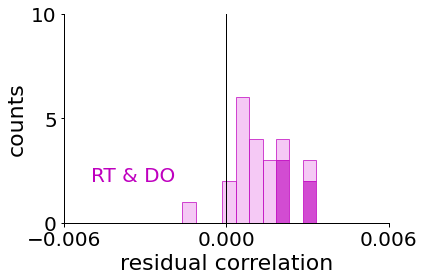

In [20]:
fig ,ax1 = plt.subplots()

ax1.hist([sigLMM_DO,nosLMM_DO],alpha=0.7,histtype='bar', stacked=True, \
         color=['m',[0.95,0.7,0.95]], edgecolor='m', linewidth=1)
ax1.text(-0.005,2,"RT & DO", ha='left', wrap=True,fontsize=20,color='m')
ax1.set_ylabel('counts',fontsize=22)
ax1.set_xticks([])
ax1.set_xticks([-0.006,0,0.006])
ax1.set_yticks([0,5,10])
ax1.set_xlabel('residual correlation',fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.axvline(0,color='k',lw=1)
plt.tight_layout()
plt.savefig('figS1_RTeff&DOeff.png')
plt.show()

In [10]:
f='corrPV.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_gabor']=v  

In [11]:
# convert string key into tuples

new_key = {}
for k,v in corr_PV_gabor.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_PV_gabor[v] = corr_PV_gabor.pop(k)
    p_PV_gabor[v] = p_PV_gabor.pop(k)
    SIG_PV_gabor[v] = SIG_PV_gabor.pop(k)
    NOS_PV_gabor[v] = NOS_PV_gabor.pop(k)

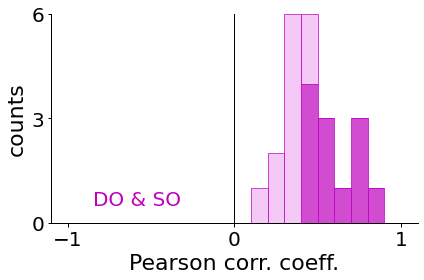

In [13]:
fig ,ax1 = plt.subplots(gridspec_kw={'hspace':0})

ax1.hist([SIG_PV_gabor[('Dsubj_optout_oo', 'Ssubj_optout_oo')],NOS_PV_gabor[('Dsubj_optout_oo', 'Ssubj_optout_oo')]],\
         bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
         color=['m',[0.95,0.7,0.95]], edgecolor='m', linewidth=1)
ax1.text(-0.85,0.5,"DO & SO", ha='left', wrap=True,fontsize=20,color='m')
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=22)
ax1.set_xticks([])
ax1.set_ylim(0,6)
ax1.set_xticks([-1,0,1])
ax1.set_xlim(-1.1,1.1)
ax1.set_xlabel('Pearson corr. coeff.',fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.axvline(0,color='k',lw=1)
plt.tight_layout()
plt.savefig('figS1_corr_Doptout_Soptout.png')
plt.show()

In [20]:
round_p_PV = [myf.roundP(p_PV_gabor[(pair)]) for pair in pair_keys_PV]
round_p_PV = myf.symmetrize(round_p_PV)

p_corr_PV_gabor=[]
ind = -1
for key in key_PV[:-3]:
    ind += 1
    p_corr_PV_gabor.append(list(round_p_PV[ind]))

In [21]:
round_r_PV = [myf.roundP(np.mean(corr_PV_gabor[(pair)])) for pair in pair_keys_PV]
round_r_PV = myf.symmetrize(round_r_PV)+np.identity(len(key_PV[:-3]))

Rcorr_PV_gabor=[]
ind = -1
for key in key_PV[:-3]:
    ind += 1
    Rcorr_PV_gabor.append(list(round_r_PV[ind]))

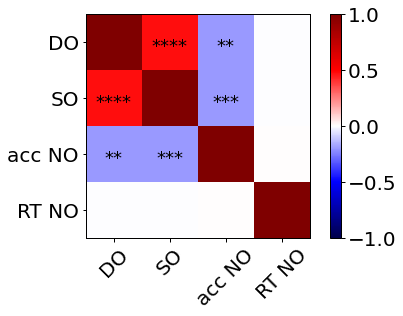

In [22]:
plt.figure(figsize=(6.5,4.5))
plt.imshow(Rcorr_PV_gabor,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),[key_name_PV[k] for k in key_PV[:-3]],rotation=45)
plt.yticks(np.arange(4),[key_name_PV[k] for k in key_PV[:-3]])
plt.colorbar()
#plt.title('Numerosity task')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

for i in range(4):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_corr_PV_gabor[i][j]),fontsize=18, ha='center', wrap=True)
plt.tight_layout()
plt.savefig('figS1_PV_corr_gabor.png')
plt.show()

In [28]:
sorted_pPV_gabor = sorted([p_PV_gabor[pair] for pair in pair_keys_PV])

In [29]:
sorted_pPV_gabor

[1.710258707893422e-11,
 0.0001523575140826122,
 0.004060977314310986,
 0.9007957913355966,
 0.9124061142737097,
 0.9298630947714568]

In [30]:
for i in range(6):
    print(sorted_pPV_gabor[i]*(6+1-(i+1)))

1.0261552247360531e-10
0.000761787570413061
0.016243909257243946
2.70238737400679
1.8248122285474193
0.9298630947714568


In [31]:
for i in range(6):
    print(sorted_pPV_gabor[i]*6)

1.0261552247360531e-10
0.0009141450844956732
0.024365863885865917
5.40477474801358
5.474436685642258
5.579178568628741
